<a href="https://colab.research.google.com/github/varunreddy1268/churn/blob/master/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [226]:
data_frame=pd.read_csv('Churn_Modelling.csv')
data_frame.drop('Surname',axis=1,inplace=True)
data_frame.drop('RowNumber',axis=1,inplace=True)
c_id=data_frame['CustomerId']
data_frame.drop('CustomerId',axis=1,inplace=True)
#data_frame.drop('Gender',axis=1,inplace=True)

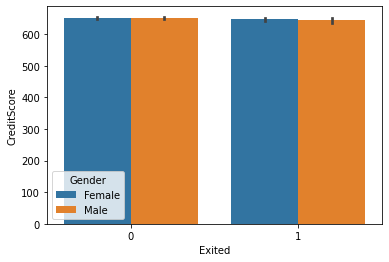

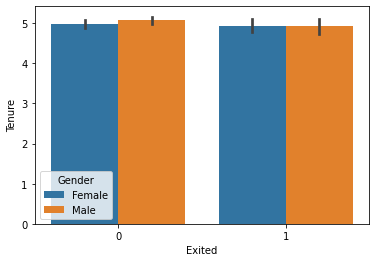

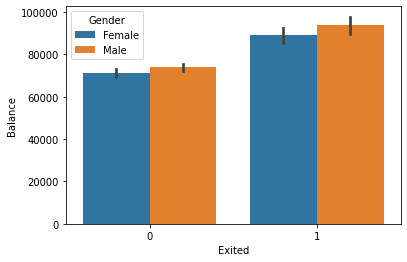

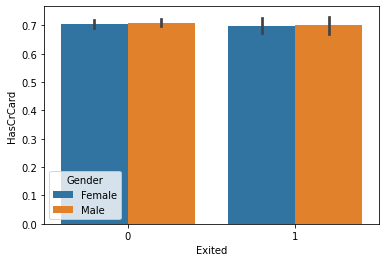

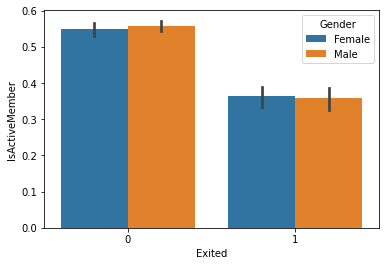

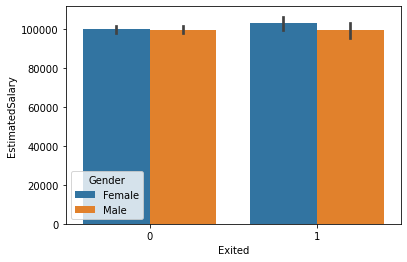

In [227]:
c=['CreditScore','Tenure','Balance','HasCrCard','IsActiveMember','EstimatedSalary']
for i in c:
  plt.figure()
  sns.barplot(x='Exited',y=i,hue='Gender',data=data_frame)

In [228]:
print(data_frame.isnull().sum()/data_frame.shape[0])
for i in data_frame.select_dtypes(include=['object']).columns.tolist():
  lb=LabelEncoder()
  data_frame[i]=lb.fit_transform(data_frame[i])
print(data_frame.info())
target=data_frame['Exited']
data_frame.drop('Exited',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=MinMaxScaler()
k=scale.fit_transform(data_frame)
data_frame=pd.DataFrame(k,columns=data_frame.columns)
print(data_frame.head())

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(

In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_frame,target,test_size=0.2,random_state=10)
print(x_train.shape,y_train.shape)
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(x_train.columns)

(8000, 10) (8000,)
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1578
           1       0.60      0.14      0.23       422

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000

[[1537   41]
 [ 361   61]]
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [230]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,3):
    
    model2=KNeighborsClassifier()
    model2.fit(x_train,y_train)
    pred=model2.predict(x_test)
    print(confusion_matrix(y_test,pred))

[[1495   83]
 [ 301  121]]
[[1495   83]
 [ 301  121]]


In [231]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
pred=model3.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('-'*50)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model4=RandomForestClassifier(n_estimators=100,max_depth=20)
model4.fit(x_train,y_train)
pred=model4.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1578
           1       0.48      0.49      0.49       422

    accuracy                           0.78      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000

[[1359  219]
 [ 216  206]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.74      0.44      0.55       422

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



In [243]:
#to  get more accuracy i am runing nueral networks

In [232]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 

In [233]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=10))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [234]:
model5=classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5506 - accuracy: 0.7658 - val_loss: 0.5029 - val_accuracy: 0.8012
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5030 - accuracy: 0.7966 - val_loss: 0.4889 - val_accuracy: 0.8012
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4892 - accuracy: 0.7966 - val_loss: 0.4793 - val_accuracy: 0.8012
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4780 - accuracy: 0.7966 - val_loss: 0.4712 - val_accuracy: 0.8012
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4678 - accuracy: 0.7966 - val_loss: 0.4610 - val_accuracy: 0.8012
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4584 - accuracy: 0.7966 - val_loss: 0.4550 - val_accuracy: 0.8012
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4504 - accuracy: 0.7966 - val_loss: 0.4475 - val_accuracy: 0.8012

In [235]:
pred=classifier.predict(x_test)
pred=[1 if i>0.5 else 0 for i in pred  ]
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1578
           1       0.73      0.44      0.55       422

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000

[[1510   68]
 [ 235  187]]


In [236]:
x_test.reset_index()


,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,937,1.000,0.5,0.0,0.351351,0.5,0.512580,0.000000,0.0,1.0,0.855505
1,9355,0.778,1.0,0.0,0.297297,0.8,0.000000,0.000000,1.0,0.0,0.835174
2,2293,0.678,1.0,0.0,0.364865,0.0,0.230310,0.000000,1.0,0.0,0.989057
3,192,0.258,0.0,1.0,0.297297,0.1,0.000000,0.333333,0.0,0.0,0.574979
4,8675,0.728,0.0,1.0,0.486486,0.7,0.502647,0.000000,1.0,0.0,0.563883
...,...,...,...,...,...,...,...,...,...,...,...
1995,5624,0.534,1.0,0.0,0.364865,0.1,0.000000,0.000000,1.0,0.0,0.716501
1996,6005,0.572,0.0,0.0,0.081081,0.9,0.000000,0.333333,0.0,1.0,0.194114
1997,987,0.438,1.0,1.0,0.216216,0.0,0.605183,0.000000,1.0,0.0,0.511490
1998,6152,0.316,0.0,0.0,0.621622,0.2,0.000000,0.000000,1.0,1.0,0.030328


In [237]:
x_test['y_pred']=pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
main_inf=x_test[['IsActiveMember','Gender','Age','y_pred']]
main_inf.head()
x_test.drop(['IsActiveMember','Gender','Age'],axis=1,inplace=True)
x_test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,y_pred
937,1.000,0.5,0.5,0.512580,0.000000,0.0,0.855505,0
9355,0.778,1.0,0.8,0.000000,0.000000,1.0,0.835174,0
2293,0.678,1.0,0.0,0.230310,0.000000,1.0,0.989057,1
192,0.258,0.0,0.1,0.000000,0.333333,0.0,0.574979,0
8675,0.728,0.0,0.7,0.502647,0.000000,1.0,0.563883,1


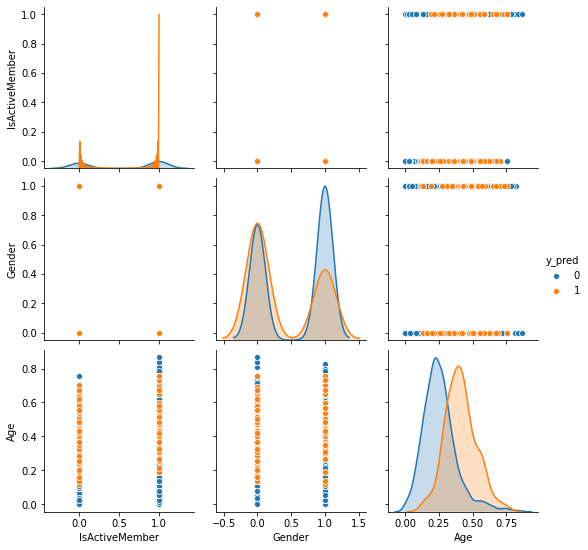

In [242]:
sns.pairplot(main_inf,hue='y_pred')

In [239]:
# from the graph we can conclude that columns which are mostly influencing columns are:-['isactivemember','age','gender'](75%)influence
#remaining columns(25%).

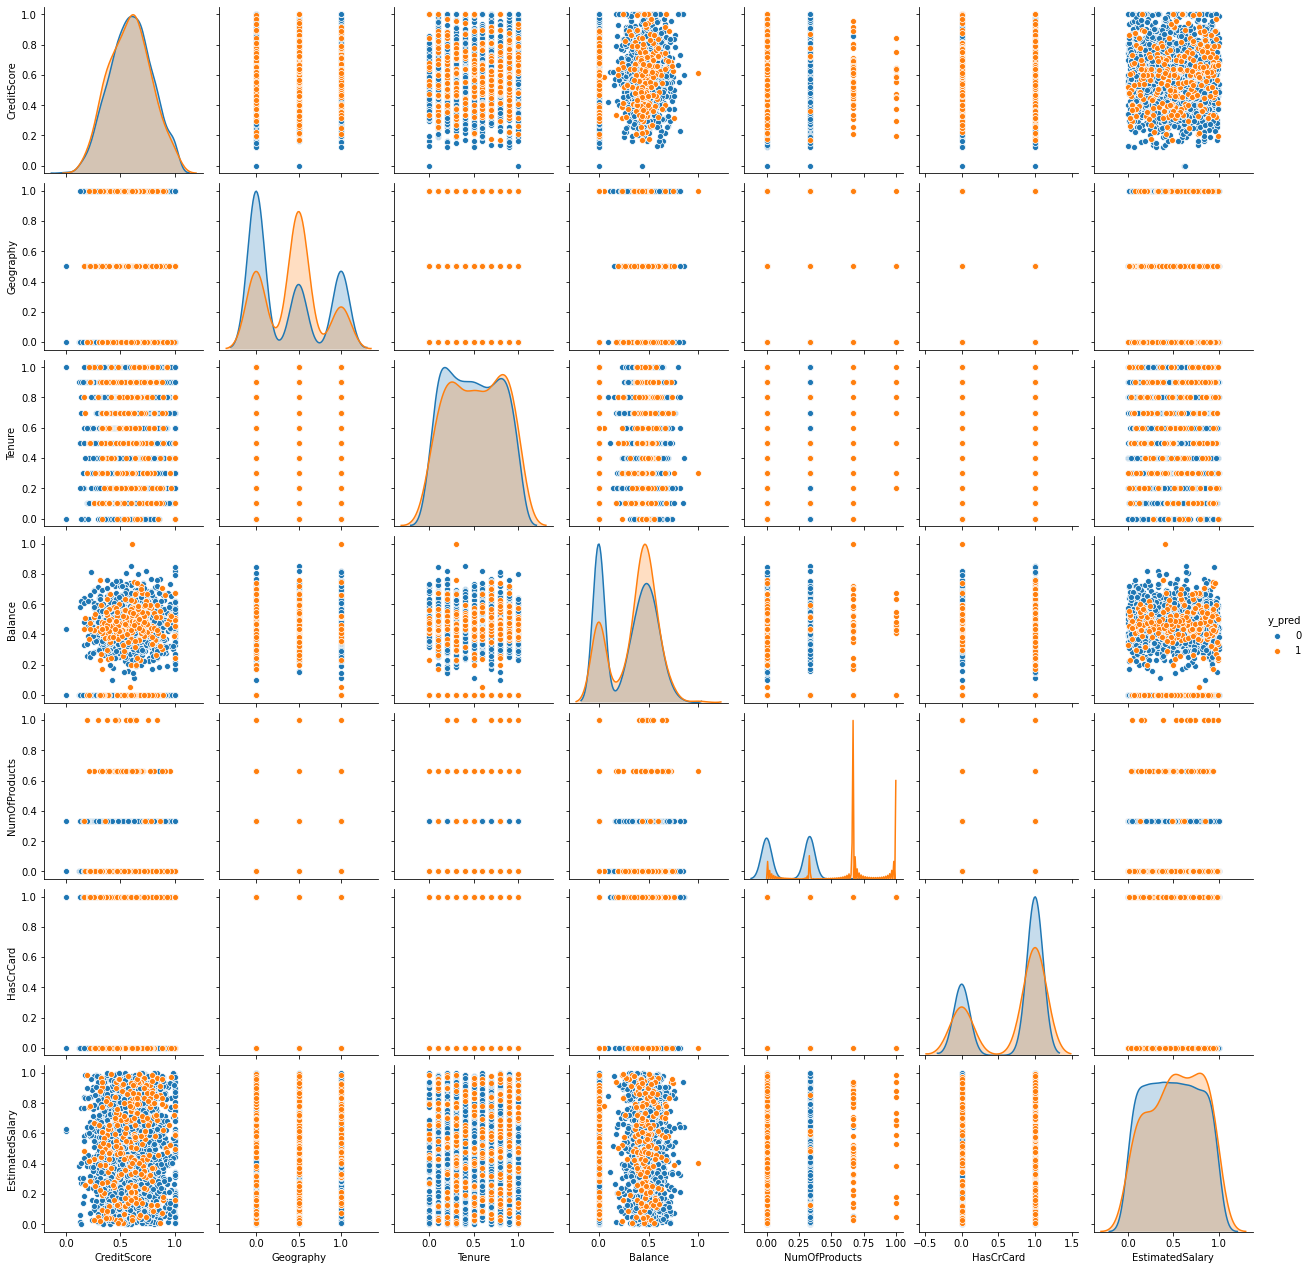

In [240]:
sns.pairplot(x_test,hue='y_pred')